In [1]:
import pandas as pd
df=pd.DataFrame({'IQ':[90,100,110,120,80],'CGPA':[8,7,6,9,5],'salary':[3,4,8,6,3]})
df
## sarlary is the target column

,IQ,CGPA,salary
0,90,8,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
model = DecisionTreeRegressor()

In [4]:
## Prediction1 is the average of the target column(i.e salary column)
## Prediction means that base_model
df['prediction1'] = df.salary.mean()

In [5]:
df

,IQ,CGPA,salary,prediction1
0,90,8,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


In [6]:
## residuals1 = Prediction1 - Target_element(i.e salary element)
## 
df['residuals1'] = df.salary - df.prediction1

In [7]:
df

,IQ,CGPA,salary,prediction1,residuals1
0,90,8,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


### For model 1

In [8]:
X=df[['IQ','CGPA']]

In [9]:
X

,IQ,CGPA
0,90,8
1,100,7
2,110,6
3,120,9
4,80,5


In [11]:
y=df.residuals1

In [12]:
y

0   -1.8
1   -0.8
2    3.2
3    1.2
4   -1.8
Name: residuals1, dtype: float64

In [13]:
model.fit(X,y)

DecisionTreeRegressor()

In [14]:
model.score(X,y)

1.0

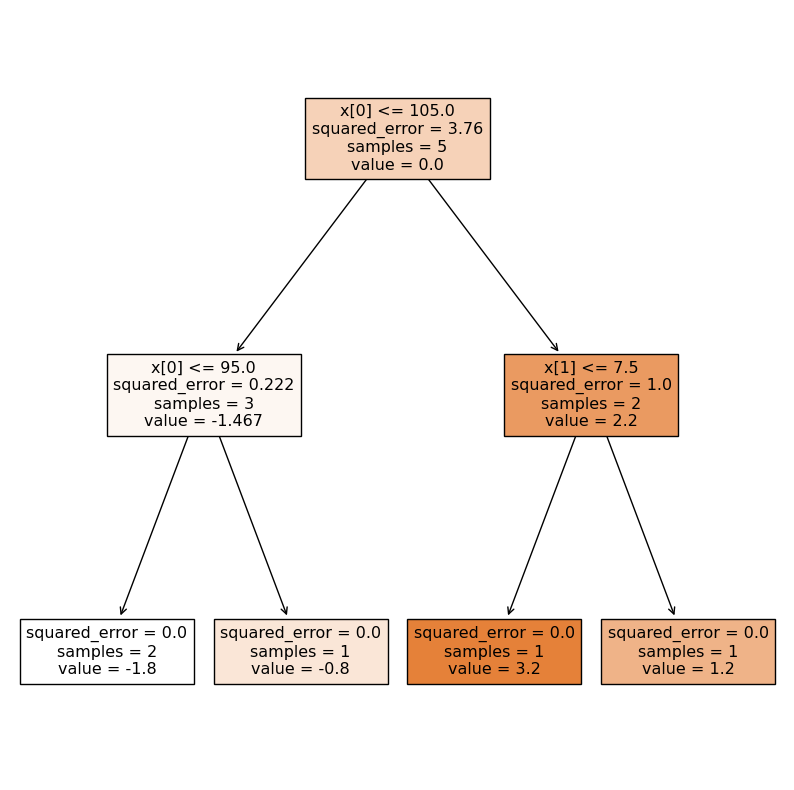

In [15]:
## to create a graph 
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()


### For Model 2

In [19]:
## Here M1 is Prediction
## Here M2 is Pred2 
## Alpha is learning rate and takes as constant value
### Here Residual1 elements sents as input to M2 

alpha = 0.1
pred2 = df.prediction1 +alpha * df.residuals1
df['prediction2'] = pred2

In [20]:
df

,IQ,CGPA,salary,prediction1,residuals1,prediction2
0,90,8,3,4.8,-1.8,4.62
1,100,7,4,4.8,-0.8,4.72
2,110,6,8,4.8,3.2,5.12
3,120,9,6,4.8,1.2,4.92
4,80,5,3,4.8,-1.8,4.62


In [21]:
## residual2 = y - y^
## y^ = M1 + alpha * M2
## Here y^ maens Pred2
df['residuals2'] = df.salary - df.prediction2


In [22]:
df

,IQ,CGPA,salary,prediction1,residuals1,prediction2,residuals2
0,90,8,3,4.8,-1.8,4.62,-1.62
1,100,7,4,4.8,-0.8,4.72,-0.72
2,110,6,8,4.8,3.2,5.12,2.88
3,120,9,6,4.8,1.2,4.92,1.08
4,80,5,3,4.8,-1.8,4.62,-1.62


In [23]:
y=df.residuals2

In [26]:
model2 = DecisionTreeRegressor()
model2.fit(X,y)
model2.score(X,y)

1.0

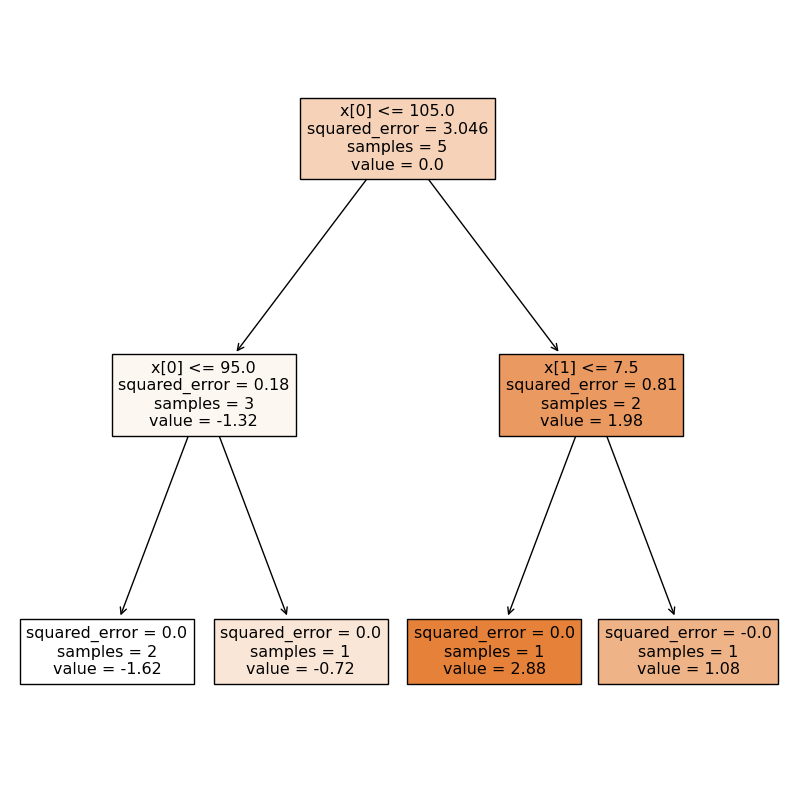

In [27]:
## to create a graph 
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model2,filled=True)
plt.show()


### For Model 3

In [28]:
## Here M1 is Prediction
## Here M2 is Pred2 
## Alpha is learning rate and takes as constant value
### Here Residual1 elements sents as input to M2 

alpha = 0.1
pred3 = df.prediction1 +alpha * df.residuals1 +alpha * df.residuals2
df['prediction3'] = pred3

In [29]:
## residual2 = y - y^
## y^ = M1 + alpha * M2
## Here y^ maens Pred2
df['residuals3'] = df.salary - df.prediction3

In [30]:
df

,IQ,CGPA,salary,prediction1,residuals1,prediction2,residuals2,prediction3,residuals3
0,90,8,3,4.8,-1.8,4.62,-1.62,4.458,-1.458
1,100,7,4,4.8,-0.8,4.72,-0.72,4.648,-0.648
2,110,6,8,4.8,3.2,5.12,2.88,5.408,2.592
3,120,9,6,4.8,1.2,4.92,1.08,5.028,0.972
4,80,5,3,4.8,-1.8,4.62,-1.62,4.458,-1.458


In [31]:
y=df.residuals3
model3 = DecisionTreeRegressor()
model3.fit(X,y)
model3.score(X,y)

1.0

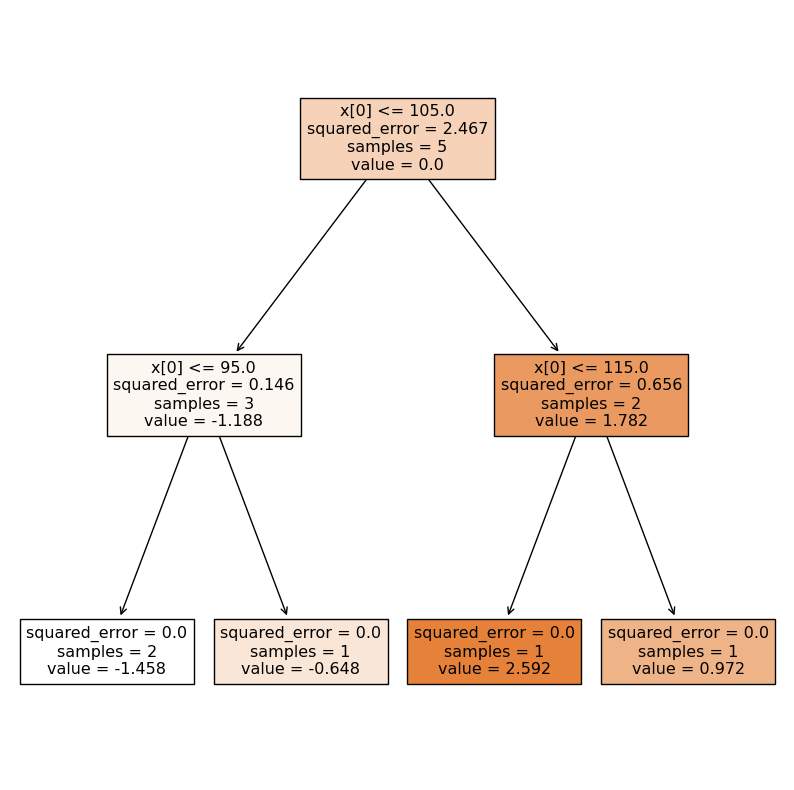

In [32]:
## to create a graph 
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model3,filled=True)
plt.show()
